In [1]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
import datetime
from sklearn import metrics

<b>Testing and training the final training data.</b>

<https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html><br>
<https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/>
<p>Let's create our random forest dataframe from final_df.csv that was made in West Nile Predictor - Creation of Final Dataframe.ipynb. Let's also turn the string values of trap into increment values using LabelEncoder. If we don't do this then random forest gives us an error: ValueError: could not convert string to float: 'T011'".</p>

In [2]:
final_df = pd.read_csv('final_df.csv')

In [3]:
#create a label (category) encoder object
le = preprocessing.LabelEncoder()

#fit the encoder to the pandas column
le.fit(list(final_df['Trap'].values))

#view labels
print(le.classes_)

#apply the fitted encoder to the pandas columns
final_df['Trap'] = le.transform(list(final_df['Trap'].values))

#change 'Date' to datetime (for some reason when you save it as a CSV it changes to object)
#dropping date since random forest won't work with datetime and wants it as a float
final_df.drop('Date', axis=1, inplace=True)

display(final_df.head(3), final_df.info())

['T001' 'T002' 'T003' 'T004' 'T005' 'T006' 'T007' 'T008' 'T009' 'T011'
 'T012' 'T013' 'T014' 'T015' 'T016' 'T017' 'T018' 'T019' 'T025' 'T027'
 'T028' 'T030' 'T031' 'T033' 'T034' 'T035' 'T036' 'T037' 'T039' 'T040'
 'T043' 'T044' 'T045' 'T046' 'T047' 'T048' 'T049' 'T050' 'T051' 'T054'
 'T054C' 'T060' 'T061' 'T062' 'T063' 'T065' 'T066' 'T067' 'T069' 'T070'
 'T071' 'T072' 'T073' 'T074' 'T075' 'T076' 'T077' 'T078' 'T079' 'T080'
 'T081' 'T082' 'T083' 'T084' 'T085' 'T086' 'T088' 'T089' 'T090' 'T091'
 'T092' 'T094' 'T094B' 'T095' 'T096' 'T097' 'T099' 'T100' 'T102' 'T103'
 'T107' 'T114' 'T115' 'T128' 'T129' 'T135' 'T138' 'T141' 'T142' 'T143'
 'T144' 'T145' 'T146' 'T147' 'T148' 'T149' 'T150' 'T151' 'T152' 'T153'
 'T154' 'T155' 'T156' 'T157' 'T158' 'T159' 'T160' 'T161' 'T162' 'T200'
 'T206' 'T209' 'T212' 'T215' 'T218' 'T219' 'T220' 'T221' 'T222' 'T223'
 'T224' 'T225' 'T226' 'T227' 'T228' 'T229' 'T230' 'T231' 'T232' 'T233'
 'T235' 'T236' 'T237' 'T238' 'T900' 'T903']
<class 'pandas.core.frame.DataF

,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,...,<= 365 days,<= 730 days,> 730 days,<= 1/2 mile,<= 1 mile,<= 3 miles,<= 5 miles,> 5 miles,Station 1,Station 2
0,1,41.954690,-87.800991,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1,41.954690,-87.800991,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,6,41.994991,-87.769279,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


None

In [4]:
feature_columns = final_df.columns.difference(['WnvPresent'])

X = final_df[feature_columns]

y = final_df['WnvPresent']

display(X.head(3), y.head(3))

,<= 1 mile,<= 1/2 mile,<= 183 days,<= 3 miles,<= 365 days,<= 5 miles,<= 730 days,<= 90 days,> 5 miles,> 730 days,...,SeaLevel,SnowFall,Station 1,Station 2,StnPressure,Tavg,Tmax,Tmin,Trap,WetBulb
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.11,0.0,1,0,29.39,74.0,88.0,60.0,1,65.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.11,0.0,1,0,29.39,74.0,88.0,60.0,1,65.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.11,0.0,1,0,29.39,74.0,88.0,60.0,6,65.0


0    0.0
1    0.0
2    0.0
Name: WnvPresent, dtype: float64

In [5]:
# Randomly splitting the original dataset into training set and testing set:
#Test size 30% Train size 70% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(6223, 39)
(6223,)
(2667, 39)
(2667,)


In [6]:
my_logreg = LogisticRegression(solver='liblinear')

# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

[0. 0. 0. ... 0. 0. 0.]


In [7]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)

0.9471316085489314


In [8]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

In [9]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

8474    0.0
3746    0.0
1260    0.0
1231    0.0
1228    0.0
       ... 
3399    0.0
121     0.0
3547    0.0
2635    0.0
2553    0.0
Name: WnvPresent, Length: 2667, dtype: float64
[0. 0. 0. ... 0. 0. 0.]
[[0.93642713 0.06357287]
 [0.98025677 0.01974323]
 [0.59426451 0.40573549]
 ...
 [0.99522916 0.00477084]
 [0.97460069 0.02539931]
 [0.99675438 0.00324562]]
[0.06357287 0.01974323 0.40573549 ... 0.00477084 0.02539931 0.00324562]


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.94632991e-04
 3.94632991e-04 1.18389897e-03 1.18389897e-03 2.76243094e-03
 2.76243094e-03 5.13022889e-03 5.13022889e-03 5.91949487e-03
 5.91949487e-03 6.31412786e-03 6.31412786e-03 1.18389897e-02
 1.18389897e-02 1.22336227e-02 1.22336227e-02 1.26282557e-02
 1.26282557e-02 1.30228887e-02 1.30228887e-02 1.49960537e-02
 1.49960537e-02 1.57853197e-02 1.57853197e-02 1.81531176e-02
 1.81531176e-02 2.40726125e-02 2.40726125e-02 2.48618785e-02
 2.48618785e-02 2.52565114e-02 2.52565114e-02 2.76243094e-02
 2.76243094e-02 2.99921073e-02 2.99921073e-02 3.07813733e-02
 3.07813733e-02 3.19652723e-02 3.19652723e-02 3.35438043e-02
 3.35438043e-02 3.47277032e-02 3.47277032e-02 3.51223362e-02
 3.51223362e-02 3.63062352e-02 3.63062352e-02 3.74901342e-02
 3.74901342e-02 3.86740331e-02 3.86740331e-02 3.90686661e-02
 3.90686661e-02 4.02525651e-02 4.02525651e-02 4.26203631e-02
 4.30149961e-02 4.65666930e-02 4.65666930e-02 4.73559590e-02
 4.73559590e-02 4.814522

AUC:  0.8267130929138157


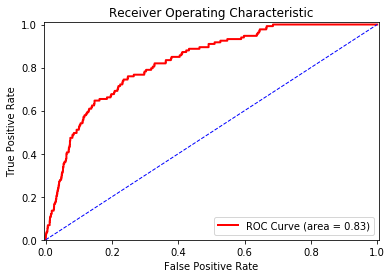

In [12]:
AUC = metrics.auc(fpr, tpr)

print("AUC: ", AUC)

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()